# Machine Learning - Regresión lineal multiple aplicada a las pruebas SABER PRO Colombia año 2020

En este proyecto se busca crear un modelo de Machine Learning para predecir el puntaje que un estudiante va obtener en las pruebsas SABER PRO. Tambien conocer cuales son los determinantes del rendimiento académico de la educación superior dado las variables sociales y economicas que proporciona el ICFES en la prueba SABER PRO aplicado en Colombia en el año 2020 a los estudiantes de educación superior.

Fuente: ICFES


### 1. Cargamos las librerias

In [1]:
import pandas as pd # Libreria para el tratamiento de DataFrames
import matplotlib.pyplot as plt # Libreria gráfica
import seaborn as sns # Libreria gráfica
from sklearn.model_selection import train_test_split # Dividir los datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression # Modelo  de Regresión lineal
from sklearn import decomposition # Modulo de PCA


### 2. Cargamos la base de datos

In [2]:
# Lectura del dataset
saber_pro = pd.read_csv("/work/base_saberpro.csv")

In [3]:
# Primeras 5 filas del dataset
saber_pro.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,CC,COLOMBIA,M,29/05/1990,NO,20203,EK202030122120,ESTUDIANTE,COLOMBIA,BOGOT�,...,2.0,17.0,21.0,117,15.0,11,58.500207,3.0,2,PUBLICAR
1,CE,VENEZUELA,M,28/12/1995,NO,20203,EK202030183321,ESTUDIANTE,VENEZUELA,BOGOT�,...,2.0,43.0,49.0,164,83.0,72,76.137447,4.0,4,PUBLICAR
2,CC,COLOMBIA,F,09/12/1977,NO,20203,EK202030300407,ESTUDIANTE,COLOMBIA,CESAR,...,2.0,18.0,30.0,124,37.0,17,40.788935,1.0,2,PUBLICAR
3,CC,COLOMBIA,F,01/10/1995,NO,20203,EK202030168977,ESTUDIANTE,COLOMBIA,LA GUAJIRA,...,2.0,21.0,22.0,133,39.0,28,32.735125,1.0,2,PUBLICAR
4,CC,COLOMBIA,F,21/01/1971,NO,20203,EK202030323133,ESTUDIANTE,COLOMBIA,ATLANTICO,...,1.0,16.0,17.0,117,18.0,11,45.381306,1.0,2,PUBLICAR


### 3. Exploración de los datos

In [ ]:
# ¿Que columnas tienen los datos?
saber_pro.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_EXTERIOR', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_AREARESIDE', 'ESTU_ESTADOCIVIL', 'ESTU_COLE_TERMINO',
       'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO',
       'ESTU_TITULOOBTENIDOBACHILLER', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
       'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO',
       'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_CURSODOCENTESIES',
       'ESTU_CURSOIESAPOYOEXTERNO', 'ESTU_CURSOIESEXTERNA',
       'ESTU_SIMULACROTIPOICFES', 'ESTU_ACTIVIDADREFUERZOAREAS',
       'ESTU_ACTIVIDADREFUERZOGENERIC', 'ESTU_TIPODOCUMENTOSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABO

In [ ]:
# ¿Que tamaño tienen los datos?
saber_pro.shape

(246436, 97)

In [ ]:
# ¿Hay datos nulos?
saber_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246436 entries, 0 to 246435
Data columns (total 97 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ESTU_TIPODOCUMENTO              246436 non-null  object 
 1   ESTU_NACIONALIDAD               246436 non-null  object 
 2   ESTU_GENERO                     246363 non-null  object 
 3   ESTU_FECHANACIMIENTO            246397 non-null  object 
 4   ESTU_EXTERIOR                   246436 non-null  object 
 5   PERIODO                         246436 non-null  int64  
 6   ESTU_CONSECUTIVO                246436 non-null  object 
 7   ESTU_ESTUDIANTE                 246436 non-null  object 
 8   ESTU_PAIS_RESIDE                246436 non-null  object 
 9   ESTU_DEPTO_RESIDE               246435 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO           246435 non-null  float64
 11  ESTU_MCPIO_RESIDE               246435 non-null  object 
 12  ESTU_COD_RESIDE_

In [ ]:
# ¿Como se comportan las variables categoricas?
saber_pro.describe(include=["O"])

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,...,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,MOD_INGLES_DESEM,ESTU_ESTADOINVESTIGACION
count,246436,246436,246363,246397,246436,246436,246436,246436,246435,246435,...,246436,246436,246436,246436,246436,246436,246354,246354,246436,246436
unique,8,49,2,12924,2,246436,1,49,34,1025,...,56,60,26,4,6,2,118,34,5,2
top,CC,COLOMBIA,F,10/09/1998,NO,EK202030293844,ESTUDIANTE,COLOMBIA,BOGOT�,BOGOT� D.C.,...,ADMINISTRACI�N,BOGOT� D.C.,BOGOT�,UNIVERSIDAD,NO OFICIAL - CORPORACI�N,N,BOGOT� D.C.,BOGOT�,A2,PUBLICAR
freq,245020,245930,145345,164,245756,1,246436,245930,66544,66544,...,52931,113299,113299,149622,88310,246419,211614,211614,68490,246385


### 3.1 Gráficos de la variable puntaje global

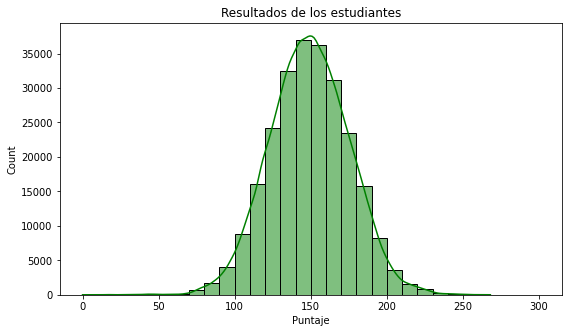

In [ ]:
# Gráficamos la variable depediente que es el puntaje de los estudiantes
plt.figure(figsize=(9,5))
sns.histplot(data = saber_pro, x = "PUNT_GLOBAL", color = "g", 
             binwidth = 10, binrange = [0, 300], kde = True)
plt.title("Resultados de los estudiantes")
plt.xlabel("Puntaje")
plt.show()

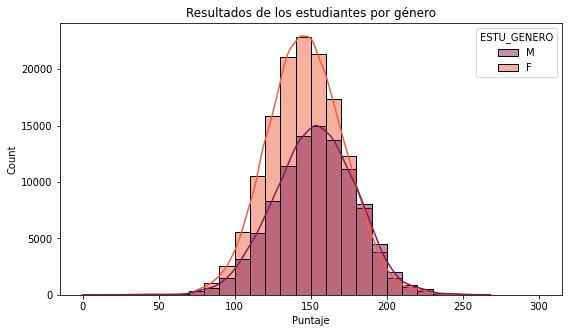

In [ ]:
# Resultados y género
plt.figure(figsize=(9,5))
sns.histplot(data = saber_pro, x = "PUNT_GLOBAL", palette = "rocket", hue = "ESTU_GENERO",  
             binwidth = 10, binrange = [0, 300], kde = True)
plt.title("Resultados de los estudiantes por género")
plt.xlabel("Puntaje")
plt.show()

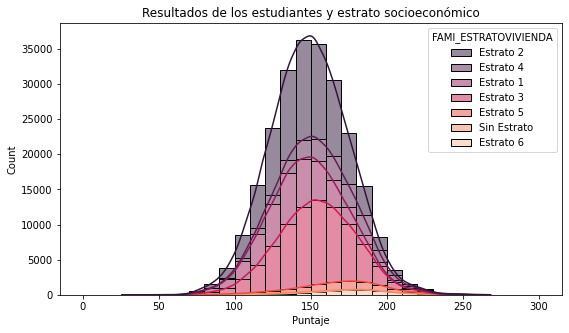

In [ ]:
# Resultados y estrato socioeconómico
plt.figure(figsize=(9,5))
sns.histplot(data = saber_pro, x = "PUNT_GLOBAL", palette = "rocket", hue = "FAMI_ESTRATOVIVIENDA", multiple = "stack",  
             binwidth = 10, binrange = [0, 300], kde = True)
plt.title("Resultados de los estudiantes y estrato socioeconómico")
plt.xlabel("Puntaje")
plt.show()

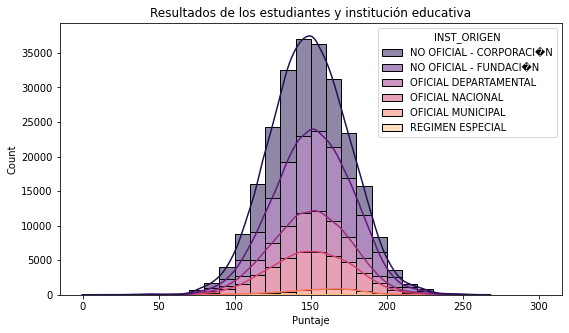

In [ ]:
# Resultados y institución educativa
plt.figure(figsize=(9,5))
sns.histplot(data = saber_pro, x = "PUNT_GLOBAL", palette = "magma", hue = "INST_ORIGEN", multiple = "stack",  
             binwidth = 10, binrange = [0, 300], kde = True)
plt.title("Resultados de los estudiantes y institución educativa")
plt.xlabel("Puntaje")
plt.show()

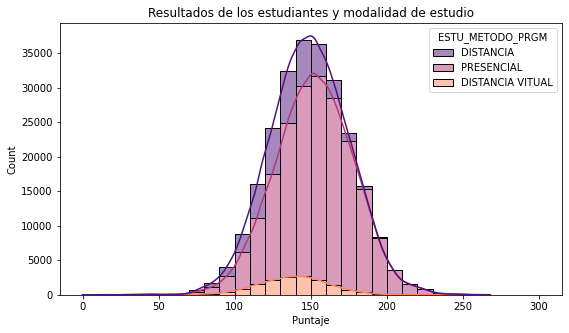

In [ ]:
# Resultados y modalidad de estudio
plt.figure(figsize=(9,5))
sns.histplot(data = saber_pro, x = "PUNT_GLOBAL", palette = "magma", hue = "ESTU_METODO_PRGM", multiple = "stack",  
             binwidth = 10, binrange = [0, 300], kde = True)
plt.title("Resultados de los estudiantes y modalidad de estudio")
plt.xlabel("Puntaje")
plt.show()

### 4. Procesamiento de datos

In [4]:
# Procedemos a seleccionar nuestras columnas de interes
saber_pro = saber_pro[["ESTU_GENERO", "ESTU_AREARESIDE", "ESTU_VALORMATRICULAUNIVERSIDAD", "ESTU_PAGOMATRICULABECA",
"FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_ESTRATOVIVIENDA", "FAMI_TIENEINTERNET",
"FAMI_TIENECOMPUTADOR", "FAMI_TIENELAVADORA", "FAMI_TIENEHORNOMICROOGAS", "FAMI_TIENESERVICIOTV",
"FAMI_TIENEAUTOMOVIL", "FAMI_TIENEMOTOCICLETA", "FAMI_TIENECONSOLAVIDEOJUEGOS",
"ESTU_HORASSEMANATRABAJA", "ESTU_METODO_PRGM", "INST_ORIGEN", "ESTU_ESTADOCIVIL", "ESTU_SIMULACROTIPOICFES", "PUNT_GLOBAL"]]

In [5]:
# Observamos las 5 primeras filas de nuestro dataset
saber_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246436 entries, 0 to 246435
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ESTU_GENERO                     246363 non-null  object
 1   ESTU_AREARESIDE                 244728 non-null  object
 2   ESTU_VALORMATRICULAUNIVERSIDAD  244627 non-null  object
 3   ESTU_PAGOMATRICULABECA          244563 non-null  object
 4   FAMI_EDUCACIONPADRE             242758 non-null  object
 5   FAMI_EDUCACIONMADRE             242510 non-null  object
 6   FAMI_ESTRATOVIVIENDA            241644 non-null  object
 7   FAMI_TIENEINTERNET              241461 non-null  object
 8   FAMI_TIENECOMPUTADOR            238856 non-null  object
 9   FAMI_TIENELAVADORA              238613 non-null  object
 10  FAMI_TIENEHORNOMICROOGAS        236804 non-null  object
 11  FAMI_TIENESERVICIOTV            241185 non-null  object
 12  FAMI_TIENEAUTOMOVIL           

### 5. Regresión lineal multiple con scikit-learn

Creamos un modelo de machine learning donde nuestra variable dependiente sera el puntaje global. Sin embargo, nuestras variables independientes son de caracter object, por tanto procederemos a su transformación a dummy para realizar el modelo.


In [6]:
# Creación de nuestra variable independiente
X = saber_pro.drop(["PUNT_GLOBAL"], axis = 1)

In [7]:
# Creación de nuestra variable dependiente
Y = saber_pro["PUNT_GLOBAL"]

In [8]:
# Procedemos a la creación de las variables dummys
X = pd.get_dummies(data = X, drop_first=True) 

Con el comando drop_first se elimina una columna para no caer en colinalidad perfecta o trampa dummy. Igualmente, al aplicar pd.get_dummies las variables con valores categoricos con Nulls / NaNs en ellos, los nulos se ignoran, es decir, se obtiene 0 en las columnas recién creadas. En este caso se dejara de esta forma dado la complejidad del tratatamiento de las variables categoricas del dataset. 

In [9]:
# Información de la variable X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246436 entries, 0 to 246435
Data columns (total 61 columns):
 #   Column                                                                   Non-Null Count   Dtype
---  ------                                                                   --------------   -----
 0   ESTU_GENERO_M                                                            246436 non-null  uint8
 1   ESTU_AREARESIDE_Cabecera Municipal                                       246436 non-null  uint8
 2   ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones  246436 non-null  uint8
 3   ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones  246436 non-null  uint8
 4   ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones  246436 non-null  uint8
 5   ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 mill�n         246436 non-null  uint8
 6   ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil                          246

In [10]:
# Dividimos nuestros datos con train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
print('Muestras de entrenamiento: ',X_train.shape[0])



Muestras de entrenamiento:  197148


In [11]:
# Regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [12]:
# Capacidad predictora
regressor.score(X_test, Y_test)

0.281577010980683

### 5.1 Aplicación de PCA

In [17]:
# Creamos la variable de pca
pca = decomposition.PCA(n_components=9)
X = pca.fit_transform(X)

In [18]:
# Dividimos nuestros datos con train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
print('Muestras de entrenamiento: ',X_train.shape[0])

Muestras de entrenamiento:  197148


In [19]:
# Regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [20]:
# Capacidad predictora
regressor.score(X_test, Y_test)

0.19590057801331984

Con la implementación de PCA solo se necesita 9 variables artificiales para llegar a un resultado de 19%.

### 6. Regresión lineal multiple con statsmodels

Utilizamos la libreria statsmodels para aplicar un modelo econométrico para conocer cuales son las variables mas significativas a la hora de explicar el rendimiento de los estudiantes. 

In [ ]:
!pip install statsmodels==0.13.1

     |████████████████████████████████| 9.9 MB 20.2 MB/s 
     |████████████████████████████████| 233 kB 52.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Importamos el modelo
import statsmodels.api as sm

In [ ]:
# Volvemos a complementar X con todos los datos
X = saber_pro.drop(["PUNT_GLOBAL"], axis = 1)

In [ ]:
# Procedemos a la creación de las variables dummys
X = pd.get_dummies(data = X, drop_first=True) 

In [ ]:
# Dividimos nuestros datos con train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
print('Muestras de entrenamiento: ',X_train.shape[0])

Muestras de entrenamiento:  197148


In [ ]:
# Regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Creación del modelo con statsmodels
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=Y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     1279.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:44:10   Log-Likelihood:            -8.9052e+05
No. Observations:              197148   AIC:                         1.781e+06
Df Residuals:                  197086   BIC:                         1.782e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### 7. Conclusiones

Podemos apreciar que las variables que tienen mayor incidencia en los resultados de los estudiantes en las pruebas SABER PRO son las siguientes:

Con respecto al género se puede apreciar que los hombres obtuvierón mejores resultados que las mujeres. Esto puede deberse a aspectos culturales y socioeconómicos.

Los estudiantes que son de las ciudades obtuvierón mejores puntajes en comparación con los que son del área rural. Lo que significa que la educación primario y secundaria en las ciudades es de mayor calidad que la rural, lo cual nos muestra que aun persiste una brecha de desigualdad educativa en Colombia.

Los estudiantes que pagan una matricula por encima de los 7 millones son los que obtuvierón mejores puntajes, lo cual refirma la calidad educativa de las universidades privadas, en comparación con las universidades publicas que en los ultimos años han presentado una disminución en su nivel educativo, dado la crisis economica que presentan muchas de ellas.

Los estudiantes becados obtuvieron buenos resultados en la prueba, puesto que existe una motivación por superar su situación economica.

Los estudiantes que tienen padres con mayor nivel educativo obtuvierón mejores puntajes en la prueba. Puesto que los padres mas educados tienen mayores ingresos, lo que significa una mayor inversión en la educación de sus hijos, ya sea con mejor material educativo, clases privadas y educación en instituciones privadas.

Los estudiantes que pertencer a los estratos socioeconómicos mas altos son los que obtuvierón mejores puntajes, debido a que en sus hogares tienen un ingreso alto y esto se traduce en mayor inversión en su educación.

Los estudiantes con acceso a internet y un cumputador obtuvierón mejores resultados. Esto nos da ha entender de la importancia de la tecnología en la educación, puesto que a través de ella se puede acceder al conocimiento global mejorando los niveles educativos.

Los estudiantes que no trabajan o tienen un horario laboral bajo en la semana otuvierón mejores puntajes, en comparación a los estudiantes que trabajn una mayor cantidad de horas a la semana. Debido a que un estudiante que no labora tiene mas tiempo para dedicarse a sus estudios, por tanto tiene mejores resultados académicos.

No obstante, hay que aclarar que el modelo obtuvo una capacidad predictora de 28%, por tanto, no es un modelo optimo, así sea que la mayoria de sus variables son significativas. Debido a la complejidad de trabajar con una base de datos que tiene artas variables categoricas con un número significativo de respuestas. Además, la política que tiene el icfes que no obliga a los estudiantes a brindar su información socioeconómica dificultado el analisis de estas variables.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=114aadd5-637a-48fb-921a-0840736ff396' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>